## Task 1

(Data generation) Pick n=20,40,60,80,100, where n is the number of
customers and the number of passengers. For each value of n, you can
generate 50 instances. For each instance, you need to generate 2 layers of
preferences. You can generate these uniformly at random, with profits from
[0,n], etas from [0,1] (1 could be 1h or some other unit like 1 day=24h),
and genders from {d,f,m}. As a starting point, you could pick n=20 and
generate 1 instance. You can move on to generating more instances once you
are certain that the profit, eta, and gender random generators are working
properly.

In [200]:
import numpy as np
import random
import pandas as pd

n = 20

def generatePreferences(n, party, layer):
    preferences = pd.DataFrame()
    
    for i in range(n):
        randomlist = []
        if layer == 1:
            if party == "driver":
                randomlist = random.choices(range(0, n),k=n)
            elif party == "passenger":
                randomlist = random.choices(np.linspace(0,1,11),k=n)
        elif layer == 2:
            randomlist = random.choices(range(0, 3),k=n)
        if party == "driver":
            preferences['driver'+str(i)] = randomlist
        elif party == "passenger":
            preferences['passenger'+str(i)] = randomlist
    
    if party == "driver":
        preferences = preferences.transpose().add_prefix("passenger").transpose()
    elif party == "passenger":
        preferences = preferences.transpose().add_prefix("driver").transpose()
    return preferences
    
    
driver_l1 = generatePreferences(n, "driver", 1)
driver_l2 = generatePreferences(n, "driver", 2)
passenger_l1 = generatePreferences(n, "passenger", 1)
passenger_l2 = generatePreferences(n, "passenger", 2)

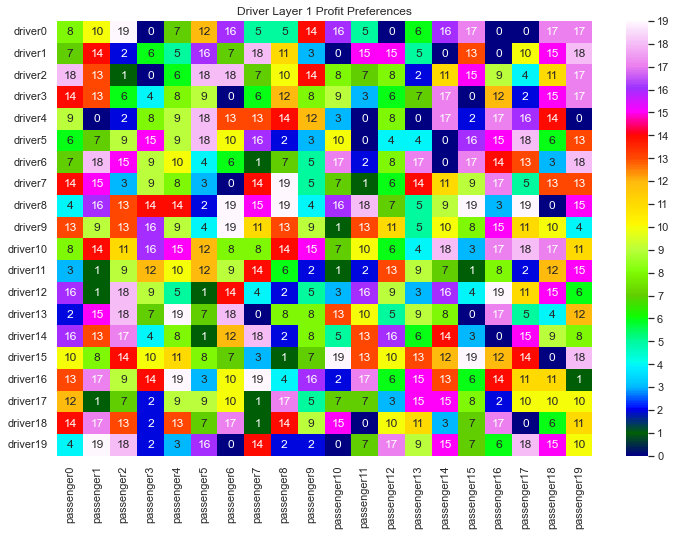

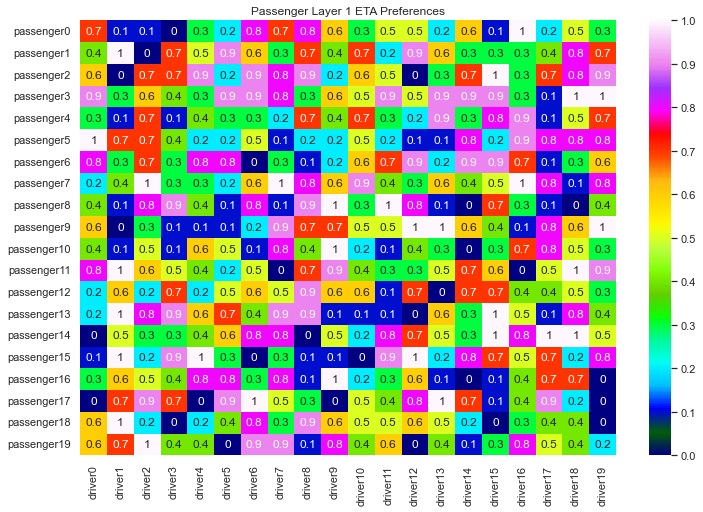

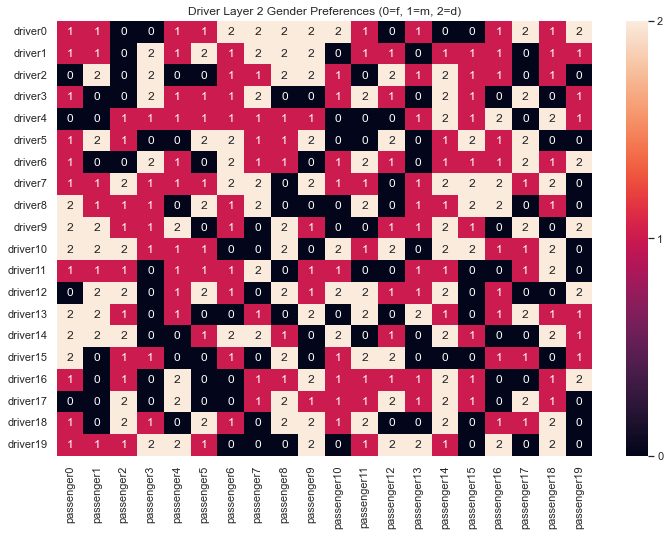

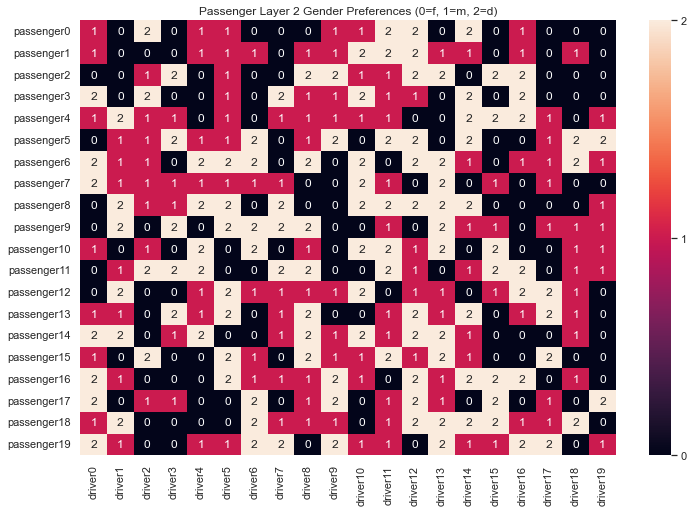

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(12,8)})

ax = plt.axes()
df = driver_l1
sns.heatmap(df.transpose(), cmap="gist_ncar", annot=True, fmt='g', ax = ax, cbar_kws = dict(ticks=range(0, n)))
ax.set_title('Driver Layer 1 Profit Preferences')
plt.show()

ax = plt.axes()
df = passenger_l1
sns.heatmap(df.transpose(), cmap="gist_ncar", annot=True, fmt='g', ax = ax, cbar_kws = dict(ticks=np.linspace(0,1,11)))
ax.set_title('Passenger Layer 1 ETA Preferences')
plt.show()

ax = plt.axes()
df = driver_l2
sns.heatmap(df.transpose(), annot=True, fmt='g', ax = ax, cbar_kws = dict(ticks=[0, 1, 2]))
ax.set_title('Driver Layer 2 Gender Preferences (0=f, 1=m, 2=d)')
plt.show()


ax = plt.axes()
df = passenger_l2
sns.heatmap(df.transpose(), annot=True, fmt='g', ax = ax, cbar_kws = dict(ticks=[0, 1, 2]))
ax.set_title('Passenger Layer 2 Gender Preferences (0=f, 1=m, 2=d)')
plt.show()


## Task 2

Task 2: (Sampling algorithms) In this part of the project, you have
already learned about the Gale-Shapley (GS) algorithm. You can find an
implementation of it in Python here:
https://github.com/Vishal-Kancharla/Gale-Shapley-Algorithm. You can extend
this implementation to design four sampling algorithms.

Sampling algorithm 1:

For i = 1 to 100000
Step 1: Pick an order of the drivers, say (d1,...,dn). Run the GS
algorithm with this order on the layer with profits and etas. Save the
returned matching in M.
Step 2: Calculate the number of blocking pairs in the matching M with
respect to the second layer of gender preferences, the total profit in M,
and the total eta in M.

In [212]:
import numpy as np
import random
import pandas as pd

n = 20

def generatePreferences(n, party, layer):
    preferences = {}
    
    for i in range(n):
        randomlist = []
        if layer == 1:
            if party == "driver":
                randomlist = random.sample(range(0, n),n)
            elif party == "passenger":
                randomlist = random.sample(range(0, n),n)
        elif layer == 2:
            randomlist = random.choices(range(0, 3),k=n)
        if party == "driver":
            preferences[i] = randomlist
        elif party == "passenger":
            preferences[i] = randomlist
    return preferences
    
    
driver_l1 = generatePreferences(n, "driver", 1)
driver_l2 = generatePreferences(n, "driver", 2)
passenger_l1 = generatePreferences(n, "passenger", 1)
passenger_l2 = generatePreferences(n, "passenger", 2)

driver_l1

{0: [12, 18, 19, 5, 16, 10, 4, 11, 17, 2, 8, 14, 0, 7, 15, 9, 6, 13, 1, 3],
 1: [13, 10, 17, 4, 11, 19, 0, 6, 7, 8, 9, 16, 3, 1, 15, 12, 5, 18, 14, 2],
 2: [11, 4, 3, 0, 13, 6, 7, 1, 17, 15, 12, 8, 16, 9, 10, 19, 18, 2, 5, 14],
 3: [16, 19, 15, 17, 10, 14, 4, 7, 11, 3, 9, 0, 1, 2, 13, 18, 5, 12, 6, 8],
 4: [6, 16, 0, 11, 9, 5, 15, 7, 14, 2, 8, 10, 3, 4, 1, 13, 19, 18, 17, 12],
 5: [4, 3, 16, 12, 6, 5, 8, 19, 11, 10, 15, 1, 9, 14, 17, 18, 7, 13, 2, 0],
 6: [10, 12, 0, 5, 8, 16, 13, 7, 15, 18, 17, 11, 14, 9, 1, 2, 19, 3, 4, 6],
 7: [1, 12, 17, 5, 10, 0, 14, 3, 16, 13, 18, 19, 9, 4, 11, 6, 15, 7, 8, 2],
 8: [10, 3, 15, 11, 12, 14, 4, 0, 9, 5, 17, 16, 6, 18, 13, 1, 2, 8, 19, 7],
 9: [15, 11, 9, 18, 1, 4, 13, 2, 17, 6, 3, 12, 10, 16, 7, 19, 14, 0, 5, 8],
 10: [15, 6, 16, 4, 3, 13, 17, 18, 1, 5, 12, 0, 2, 10, 19, 9, 14, 8, 11, 7],
 11: [8, 2, 3, 15, 1, 12, 4, 13, 16, 9, 6, 14, 0, 7, 17, 10, 19, 18, 11, 5],
 12: [16, 18, 2, 12, 13, 0, 4, 5, 17, 19, 15, 8, 14, 6, 1, 9, 7, 10, 11, 3],
 13: [17,

In [253]:
driverPreferences = driver_l1
passengerPreferences = passenger_l1


def stableMatching(n, driverPreferences, passengerPreferences):
    unmatched = list(range(n))
    driverID = {f"driver{key}": val for key, val in driverPreferences.items()}
    driverID = list(driverID.keys())
    driverMatch = [None] * n
    passengerMatch = [None] * n
    nextChoice = [0] * n

    while unmatched:
        
        driver = unmatched[0]
        dPreferences = driverPreferences[driver]
        passenger = dPreferences[nextChoice[driver]]
        pPreferences = passengerPreferences[passenger]
        currentMatch = passengerMatch[passenger]
    
        if currentMatch == None:
            passengerMatch[passenger] = driver
            driverMatch[driver] = passenger
            nextChoice[driver] = nextChoice[driver] + 1
            unmatched.pop(0)
        else:
            currentIndex = pPreferences.index(currentMatch)
            hisIndex = pPreferences.index(driver)
            if currentIndex > hisIndex:
                passengerMatch[passenger] = driver
                driverMatch[driver] = passenger
                nextChoice[driver] = nextChoice[driver] + 1
                unmatched.pop(0)
                unmatched.insert(0, currentMatch)
            else:
                nextChoice[driver] = nextChoice[driver] + 1
                
    driverMatch = dict(zip(driverID, driverMatch))      
    return driverMatch


print(stableMatching(n, driverPreferences, passengerPreferences))

#Get driver profit and customer ETA

#Calculate Sum

{'driver0': 12, 'driver1': 13, 'driver2': 11, 'driver3': 15, 'driver4': 6, 'driver5': 4, 'driver6': 10, 'driver7': 1, 'driver8': 3, 'driver9': 9, 'driver10': 16, 'driver11': 8, 'driver12': 2, 'driver13': 17, 'driver14': 7, 'driver15': 19, 'driver16': 0, 'driver17': 18, 'driver18': 14, 'driver19': 5}


Sampling algorithm 2:

For i = 1 to 100000
Step 1: Pick an order of the passengers, say (p1,...,pn). Run the GS
algorithm with this order on the layer with profits and etas. Save the
returned matching in M.
Step 2: Calculate the number of blocking pairs in M with respect to the
second layer of gender preferences, the total profit in M, and the total
eta in M.


Sampling algorithm 3:

For i = 1 to 100000
Step 1: Pick an order of the drivers, say (d1,...,dn). Run the GS
algorithm with this order on the layer with gender preferences. Save the
returned matching in M.
Step 2: Calculate the number of blocking pairs in M with respect to the
first layer of profit and eta preferences, the total profit in M, and the
total eta in M.

Sampling algorithm 4:

For i = 1 to 100000
Step 1: Pick an order of the passengers, say (p1,...,pn). Run the GS
algorithm with this order on the layer with gender preferences. Save the
returned matching in M.
Step 2: Calculate the number of blocking pairs in M with respect to the
first layer of profit and eta preferences, the total profit in M, and the
total eta in M.

Task 3: (Empirical comparison) In this part, you should plot the results
returned of the four sampling algorithms and discuss their performance.
For plotting, you may use Python or some other programming language.